In [120]:
import json
import numpy as np
import pandas as pd
from nltk.metrics import edit_distance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, average_precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [121]:
#Load Dataset
locu_train = pd.read_json('locu_train.json')
four_train = pd.read_json('foursquare_train.json')
match_train = pd.read_csv('matches_train.csv')
locu_test = pd.read_json('locu_test.json')
four_test = pd.read_json('foursquare_test.json')

In [122]:
locu_test

,country,id,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
0,United States,b48da849c54f904013e2,40.758005,New York,-73.992727,Panda Restaurant,2126950836,10036,NY,570 9th Ave.,http://pandarg.com/
1,United States,95ad783fd1c65bb8fdbf,40.721025,New York,-73.982903,El Maguey y la Tuna,2124733919,10002,NY,321 East Houston St.,http://www.elmagueyylatunamex.com
2,United States,5060d123ccad77923b20,40.725772,New York,-73.991947,Hair Date Salon/ Professionals Hair Cut,2122288381,10003,NY,329 Bowery,http://www.hairdatenyc.com/
3,United States,9dd6f6b177096efd5da4,40.802047,New York,-73.936988,Pizza Plus Inc,2122890005,10035,NY,2253 3rd Ave. # 1,http://www.pizzaplusmore.com/
4,United States,4773c30d2df4368c0d09,40.725190,New York,-73.992547,Double Crown,2122540350,10012,NY,316 Bowery,http://doublecrown-nyc.com
5,United States,206c363a5907bfa98ec0,40.737576,New York,-73.996471,Pink Tea Cup,2122060605,10011,NY,538 6th Ave.,http://www.thinkpinkteacup.com/
6,United States,cb95d1e0730222cc3209,40.760685,New York,-73.982570,Roses Mexicano,,10022,NY,1st Ave.,
7,United States,ecdc736a7d663a46e01d,40.768370,New York,-73.984916,Hudson Common @ the Hudson,2125546217,10019,NY,356 W. 58th St.,http://www.hudsonhotel.com/#/explor
8,United States,25ca87e725b930488ed6,40.755325,New York,-73.990906,Starbucks,2129977341,10018,NY,600 Eighth Ave.,http://www.starbucks.com/
9,United States,4f9710321455164d1cb4,40.742367,New York,-74.003204,..nyc jaajjjj......:-D,,10011,NY,,


### 1. Observe datasets

In [123]:
locu_train.shape, four_train.shape

((600, 11), (600, 11))

In [124]:
locu_test.shape, four_test.shape

((400, 11), (400, 11))

In [125]:
locu_train.head()

,country,id,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
0,United States,cc9e8f40230c6ead2873,40.739822,New York,-73.985144,Chipotle Mexican Grill,2126736904,10010,NY,125 East 23rd St.,http://www.chipotle.com/
1,United States,81df045e563fb6cab7f7,40.810765,New York,-73.952591,Honey Salon Inc,2126630100,10026,NY,174 Saint Nicholas Ave.,
2,United States,b265cf6c80121211dbfc,40.743580,New York,-73.986127,Palatte,6464763812,10016,NY,66 Madison Ave.,http://www.palattenyc.com/
3,United States,4fc50abefae5311cc2b3,40.828820,New York,-73.949022,Best Taste Restaurant,2122815691,10031,NY,3609 Broadway,
4,United States,72560dc41f1b7aed0d47,40.749936,New York,-73.983849,Integra Hair System Inc,2125636786,10018,NY,11 W. 36th St. # 3,http://www.integrahair.com/


In [126]:
four_train.head()

,country,id,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
0,United States,4f328ea619836c91c7e3714a,40.794855,New York,-73.966069,Chen Jin Diao Restaurant,(212) 678-4680,,NY,800 Columbus Ave.,
1,United States,4c37b5f6ae2da593a56affc5,40.760460,New York,-73.994920,West Side Steakhouse,(212) 564-4803,10036,NY,597 10th Ave.,
2,United States,4b41060df964a52098bf25e3,40.760249,New York,-73.983746,Pearls: Chinese & Szechuan Cuisine,(212) 582-7380,10019,NY,732 7th Ave.,
3,United States,3fd66200f964a520ece41ee3,40.708660,New York,-74.011263,Suspenders,(212) 732-5005,10006,NY,111 Broadway,http://www.suspendersnyc.com
4,United States,52064aab11d284f64d088329,40.718105,New York,-73.996096,Grand Century Cafe,None,,NY,,


In [127]:
match_train.head()

,locu_id,foursquare_id
0,1dae3a8f02f730c3528d,4b694c01f964a520139e2be3
1,219c994dcc53f891ec26,506b6162e4b02bda7fc846ee
2,e06dd73a03f255a877de,4fcb5d2ee4b0928dc1d32f10
3,cf429074f6b45f0ad183,4c2d2315e116e21e1b1a8e60
4,be428df89cec53c29e96,43ed7e9ef964a5204e2f1fe3


In [128]:
pd.concat([locu_train.apply(lambda x: sum(x.isnull())).rename("num_missing"),
          locu_train.apply(lambda x: sum(x=="unknown")).rename("num_unkowns"),
          locu_train.apply(lambda x: len(np.unique(x))).rename("num_unique")],axis=1)

,num_missing,num_unkowns,num_unique
country,0,0,1
id,0,0,600
latitude,1,0,587
locality,0,0,1
longitude,1,0,584
name,0,0,586
phone,0,0,498
postal_code,0,0,68
region,0,0,1
street_address,0,0,561


In [129]:
pd.concat([locu_test.apply(lambda x: sum(x.isnull())).rename("num_missing"),
          locu_test.apply(lambda x: sum(x=="unknown")).rename("num_unkowns"),
          locu_test.apply(lambda x: len(np.unique(x))).rename("num_unique")],axis=1)

,num_missing,num_unkowns,num_unique
country,0,0,1
id,0,0,400
latitude,1,0,395
locality,0,0,1
longitude,1,0,395
name,0,0,392
phone,0,0,334
postal_code,0,0,63
region,0,0,1
street_address,0,0,372


### 2. Data processing

In [130]:
#Change phone number to the same foramt
locu_train.loc[:, "phone"] = locu_train.phone.str.replace("[^0-9]", "")
four_train.loc[:, "phone"] = four_train.phone.str.replace("[^0-9]", "")

locu_test.loc[:, "phone"] = locu_test.phone.str.replace("[^0-9]", "")
four_test.loc[:, "phone"] = four_test.phone.str.replace("[^0-9]", "")

In [131]:
#Change name to lowercases
locu_train.loc[:, "name"] = locu_train.name.str.lower()
four_train.loc[:, "name"] = four_train.name.str.lower()

locu_test.loc[:, "name"] = locu_test.name.str.lower()
four_test.loc[:, "name"] = four_test.name.str.lower()

In [132]:
#Change street_address
locu_train.loc[:, "street_address"] = locu_train.street_address.str.lower()
four_train.loc[:, "street_address"] = four_train.street_address.str.lower()

locu_train.loc[:, "street_address"] = locu_train.street_address.str.replace("w\.", "west ")
four_train.loc[:, "street_address"] = four_train.street_address.str.replace("w\.", "west ")

locu_train.loc[:, "street_address"] = locu_train.street_address.str.replace("e\.", "east ")
four_train.loc[:, "street_address"] = four_train.street_address.str.replace("e\.", "east ")

In [133]:
locu_test.loc[:, "street_address"] = locu_test.street_address.str.lower()
four_test.loc[:, "street_address"] = four_test.street_address.str.lower()

locu_test.loc[:, "street_address"] = locu_test.street_address.str.replace("w\.", "west ")
four_test.loc[:, "street_address"] = four_test.street_address.str.replace("w\.", "west ")

locu_test.loc[:, "street_address"] = locu_test.street_address.str.replace("e\.", "east ")
four_test.loc[:, "street_address"] = four_test.street_address.str.replace("e\.", "east ")

In [134]:
#Change website to lower cases
locu_train.loc[:, "website"] = locu_train.website.str.lower()
four_train.loc[:, "website"] = four_train.website.str.lower()

locu_test.loc[:, "website"] = locu_test.website.str.lower()
four_test.loc[:, "website"] = four_test.website.str.lower()

### 3. Join datasets and culculate the difference between features

In [135]:
trainSet = locu_train.merge(four_train, how = "outer", on = ["country", "region", "locality", "postal_code"])
testSet = locu_test.merge(four_test, how = "outer", on = ["country", "region", "locality", "postal_code"])

In [136]:
#Drop rows with all nan
trainSet = trainSet.dropna(subset=['latitude_x', 'longitude_x', 'name_x', 'street_address_x'], how='all')
trainSet = trainSet.dropna(subset=['latitude_y', 'longitude_y', 'name_y', 'street_address_y'], how='all')

testSet = testSet.dropna(subset=['latitude_x', 'longitude_x', 'name_x', 'street_address_x'], how='all')
testSet = testSet.dropna(subset=['latitude_y', 'longitude_y', 'name_y', 'street_address_y'], how='all')

In [137]:
trainSet.shape, testSet.shape

((16027, 18), (6881, 18))

In [138]:
#Difference between features
trainSet = trainSet.assign(lat_diff = np.abs(trainSet.latitude_x - trainSet.latitude_y))
trainSet = trainSet.assign(long_diff = np.abs(trainSet.longitude_x - trainSet.longitude_y))
trainSet = trainSet.assign(phone_diff = 1*(trainSet.phone_x == trainSet.phone_y))

In [139]:
testSet = testSet.assign(lat_diff = np.abs(testSet.latitude_x - testSet.latitude_y))
testSet = testSet.assign(long_diff = np.abs(testSet.longitude_x - testSet.longitude_y))
testSet = testSet.assign(phone_diff = 1*(testSet.phone_x == testSet.phone_y))

In [140]:
#Distance between features in names
trainSet.loc[:, "name_diff"]= trainSet.apply(lambda x: edit_distance(x["name_x"], x["name_y"]), axis=1)

testSet.loc[:, "name_diff"]= testSet.apply(lambda x: edit_distance(x["name_x"], x["name_y"]), axis=1)

In [141]:
#Distance between features in address
trainSet.loc[:, "address_diff"]= trainSet.apply(lambda x: edit_distance(x["street_address_x"], x["street_address_y"]), axis=1)

testSet.loc[:, "address_diff"]= testSet.apply(lambda x: edit_distance(x["street_address_x"], x["street_address_y"]), axis=1)

In [142]:
#Distance between features in website
trainSet.loc[:, "web_diff"]= trainSet.apply(lambda x: edit_distance(x["website_x"], x["website_y"]), axis=1)

testSet.loc[:, "web_diff"]= testSet.apply(lambda x: edit_distance(x["website_x"], x["website_y"]), axis=1)

In [143]:
match_train.head()

,locu_id,foursquare_id
0,1dae3a8f02f730c3528d,4b694c01f964a520139e2be3
1,219c994dcc53f891ec26,506b6162e4b02bda7fc846ee
2,e06dd73a03f255a877de,4fcb5d2ee4b0928dc1d32f10
3,cf429074f6b45f0ad183,4c2d2315e116e21e1b1a8e60
4,be428df89cec53c29e96,43ed7e9ef964a5204e2f1fe3


### 4. Add label to dataset

In [144]:
#Rename trainSet
trainSet.columns.values[1] = 'locu_id'
trainSet.columns.values[11] = 'foursquare_id'
trainSet.head()

,country,locu_id,latitude_x,locality,longitude_x,name_x,phone_x,postal_code,region,street_address_x,...,name_y,phone_y,street_address_y,website_y,lat_diff,long_diff,phone_diff,name_diff,address_diff,web_diff
0,United States,cc9e8f40230c6ead2873,40.739822,New York,-73.985144,chipotle mexican grill,2126736904,10010,NY,125 east 23rd st.,...,via emilia,2125053072,47 east 21st st.,http://viaemilianyc.net,0.000564,0.002991,0,17,7,16
1,United States,cc9e8f40230c6ead2873,40.739822,New York,-73.985144,chipotle mexican grill,2126736904,10010,NY,125 east 23rd st.,...,the crepes truck,None,6 east 23rd st.,,0.001128,0.002769,0,17,4,24
2,United States,cc9e8f40230c6ead2873,40.739822,New York,-73.985144,chipotle mexican grill,2126736904,10010,NY,125 east 23rd st.,...,eau,2123588647,913 broadway,,0.000259,0.004682,0,20,15,24
3,United States,cc9e8f40230c6ead2873,40.739822,New York,-73.985144,chipotle mexican grill,2126736904,10010,NY,125 east 23rd st.,...,the yard bar,None,55 west 21st st.,,0.001554,0.008091,0,18,8,24
4,United States,cc9e8f40230c6ead2873,40.739822,New York,-73.985144,chipotle mexican grill,2126736904,10010,NY,125 east 23rd st.,...,white walls,None,,,0.003752,0.005549,0,15,17,24


In [145]:
testSet.columns.values[1] = 'locu_id'
testSet.columns.values[11] = 'foursquare_id'
testSet.head()

,country,locu_id,latitude_x,locality,longitude_x,name_x,phone_x,postal_code,region,street_address_x,...,name_y,phone_y,street_address_y,website_y,lat_diff,long_diff,phone_diff,name_diff,address_diff,web_diff
0,United States,b48da849c54f904013e2,40.758005,New York,-73.992727,panda restaurant,2126950836,10036,NY,570 9th aveast,...,the biggest little bar,None,59 west 46th st.,,0.000568,0.011167,0,19,12,19
1,United States,b48da849c54f904013e2,40.758005,New York,-73.992727,panda restaurant,2126950836,10036,NY,570 9th aveast,...,tiger bar and grill,None,15 west 43rd st.,,0.003524,0.011397,0,16,12,19
2,United States,b48da849c54f904013e2,40.758005,New York,-73.992727,panda restaurant,2126950836,10036,NY,570 9th aveast,...,panda restaurant,2126950836,570 9th aveast,http://www.pandarg.com,0.000013,0.000086,1,0,0,5
3,United States,b48da849c54f904013e2,40.758005,New York,-73.992727,panda restaurant,2126950836,10036,NY,570 9th aveast,...,church's chicken,2123159600,705 8th aveast,,0.000670,0.003678,0,16,3,19
4,United States,b48da849c54f904013e2,40.758005,New York,-73.992727,panda restaurant,2126950836,10036,NY,570 9th aveast,...,brooklyn hummus,None,moving target,,0.001748,0.007494,0,15,13,19


In [146]:
trainSet._data = trainSet._data.rename_axis(lambda x: x, 0, True)
testSet._data = testSet._data.rename_axis(lambda x: x, 0, True)

In [147]:
#Set match as 1
match_train['match'] = 1
match_train.head()

,locu_id,foursquare_id,match
0,1dae3a8f02f730c3528d,4b694c01f964a520139e2be3,1
1,219c994dcc53f891ec26,506b6162e4b02bda7fc846ee,1
2,e06dd73a03f255a877de,4fcb5d2ee4b0928dc1d32f10,1
3,cf429074f6b45f0ad183,4c2d2315e116e21e1b1a8e60,1
4,be428df89cec53c29e96,43ed7e9ef964a5204e2f1fe3,1


In [148]:
train = trainSet.merge(match_train, how = "outer", on = ["locu_id", "foursquare_id"])
test = testSet

In [149]:
train.shape, test.shape

((16078, 25), (6881, 24))

In [150]:
#Fill nan with 0 in match column
values = {'match': 0}
train = train.fillna(value = values)

In [151]:
list(train)

['country',
 'locu_id',
 'latitude_x',
 'locality',
 'longitude_x',
 'name_x',
 'phone_x',
 'postal_code',
 'region',
 'street_address_x',
 'website_x',
 'foursquare_id',
 'latitude_y',
 'longitude_y',
 'name_y',
 'phone_y',
 'street_address_y',
 'website_y',
 'lat_diff',
 'long_diff',
 'phone_diff',
 'name_diff',
 'address_diff',
 'web_diff',
 'match']

In [152]:
test.index = pd.RangeIndex(len(test.index))

### 5. Train data with Random Forest 

In [153]:
data = train[['lat_diff','long_diff', 'phone_diff', 'name_diff','address_diff','web_diff', 'match']]
data_test = test[['lat_diff','long_diff', 'phone_diff', 'name_diff','address_diff','web_diff']]
#y_train = train[['match']]

In [154]:
data.shape, data_test.shape

((16078, 7), (6881, 6))

In [155]:
data = data.dropna(subset = ['lat_diff','long_diff', 'phone_diff', 'name_diff','address_diff','web_diff'], how='all')
data_test = data_test.dropna(subset = ['lat_diff','long_diff', 'phone_diff', 'name_diff','address_diff','web_diff'], how='all')

In [156]:
data.shape,data_test.shape

((16027, 7), (6881, 6))

In [157]:
X_train = data[['lat_diff','long_diff', 'phone_diff', 'name_diff','address_diff','web_diff']]
y_train = data[['match']]

X_test = data_test[['lat_diff','long_diff', 'phone_diff', 'name_diff','address_diff','web_diff']]

In [158]:
pd.concat([X_train.dtypes,
           y_train.dtypes,
           X_test.dtypes],axis = 1) 

,0,1,2
address_diff,float64,NaN,int64
lat_diff,float64,NaN,float64
long_diff,float64,NaN,float64
match,NaN,float64,NaN
name_diff,float64,NaN,int64
phone_diff,float64,NaN,int64
web_diff,float64,NaN,int64


In [159]:
pd.concat([X_train.apply(lambda x: sum(x.isnull())).rename("num_missing"),
          X_test.apply(lambda x: sum(x.isnull())).rename("num_missing")],axis=1)

,num_missing,num_missing
lat_diff,13,12
long_diff,13,12
phone_diff,0,0
name_diff,0,0
address_diff,0,0
web_diff,0,0


In [163]:
X_train[X_train['lat_diff'].isnull()]

,lat_diff,long_diff,phone_diff,name_diff,address_diff,web_diff
26,NaN,NaN,0.0,16.0,17.0,11.0
27,NaN,NaN,0.0,15.0,16.0,27.0
28,NaN,NaN,0.0,19.0,12.0,27.0
29,NaN,NaN,0.0,15.0,17.0,27.0
30,NaN,NaN,0.0,16.0,0.0,27.0
31,NaN,NaN,0.0,15.0,17.0,27.0
32,NaN,NaN,0.0,17.0,34.0,27.0
33,NaN,NaN,0.0,15.0,8.0,27.0
34,NaN,NaN,0.0,17.0,17.0,27.0
35,NaN,NaN,0.0,18.0,27.0,14.0


In [164]:
X_test[X_test['lat_diff'].isnull()]

,lat_diff,long_diff,phone_diff,name_diff,address_diff,web_diff
1686,NaN,NaN,0,7,15,17
1687,NaN,NaN,0,12,13,19
1688,NaN,NaN,0,22,13,19
1689,NaN,NaN,0,9,11,19
1690,NaN,NaN,0,22,14,15
1691,NaN,NaN,0,15,5,17
1692,NaN,NaN,0,12,15,16
1693,NaN,NaN,0,13,13,19
1694,NaN,NaN,0,28,16,13
1695,NaN,NaN,0,9,14,19


In [165]:
X_train = X_train.apply(lambda x:x.fillna(x.value_counts().index[0]))
X_test = X_test.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [166]:
X_train[['lat_diff']] = pd.to_numeric(X_train.lat_diff)
X_train[['long_diff']] = pd.to_numeric(X_train.long_diff)

In [168]:
rf = RandomForestClassifier(n_estimators=95)
rf.fit(X_train, y_train)

/Users/zhaoqinwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=95, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [169]:
print("f1_score of random forest: {:.3f}".format(
      f1_score(y_train, rf.predict(X_train))))

f1_score of random forest: 1.000


In [170]:
ap_rf = average_precision_score(y_train, rf.predict_proba(X_train)[:, 1])
print("Average precision of random forest: {:.3f}".format(ap_rf))

Average precision of random forest: 1.000


In [171]:
print("Average recall of random forest: ", recall_score(y_train, rf.predict(X_train)))

Average recall of random forest:  1.0


In [172]:
y_predict = rf.predict(X_test)

In [173]:
match = pd.DataFrame({'match': y_predict})

In [174]:
matches_test = test.join(match)

In [175]:
matches_test[matches_test['match'] == 1.0]

,country,locu_id,latitude_x,locality,longitude_x,name_x,phone_x,postal_code,region,street_address_x,...,phone_y,street_address_y,website_y,lat_diff,long_diff,phone_diff,name_diff,address_diff,web_diff,match
2,United States,b48da849c54f904013e2,40.758005,New York,-73.992727,panda restaurant,2126950836,10036,NY,570 9th aveast,...,2126950836,570 9th aveast,http://www.pandarg.com,0.000013,0.000086,1,0,0,5,1.0
24,United States,62b24f96cfd688427793,40.760450,New York,-73.995531,happy family chinese restaurant,2126956035,10036,NY,500 west 43rd st.,...,2126956035,500 west 43rd st.,,0.000661,0.000280,1,0,1,34,1.0
67,United States,5cf740cd2f459b3adf4a,40.755215,New York,-73.980984,jewel of india,2128695544,10036,NY,15 west 44th st.,...,2128695544,15 west 44th st.,http://jewelofindianyc.com,0.000000,0.000000,1,0,0,0,1.0
81,United States,cf5c0c3850b153c65de0,40.757243,New York,-73.989778,south philly steaks,,10036,NY,,...,None,,,0.000000,0.000000,0,0,0,0,1.0
122,United States,09f365913e3f95717962,40.758261,New York,-73.993411,theater row,,10036,NY,410 west 42nd st.,...,None,410 west 42nd st.,,0.000000,0.000000,0,0,0,0,1.0
138,United States,dfbf97a23697bda1f336,40.759079,New York,-73.987968,frankie & johnnie's steakhouse,2129979494,10036,NY,269 west 45th st.,...,2129979494,269 west 45th st.,http://www.frankieandjohnnies.com,0.000100,0.000186,1,3,1,1,1.0
149,United States,b44a5d3c5b07627dc2ad,40.757364,New York,-73.985485,the lodge @ 1515,2128466633,10036,NY,1515 broadway,...,2128466633,1515 broadway,,0.000000,0.000000,1,0,0,0,1.0
184,United States,e34c98f447b1b7dc1d1e,40.756257,New York,-73.985233,brooklyn hummus,,10036,NY,moving target,...,None,moving target,,0.000000,0.000000,0,0,0,0,1.0
201,United States,3130f6fd989210a73c9a,40.758918,New York,-73.988773,church's chicken,2123159600,10036,NY,705 8th aveast,...,2123159600,705 8th aveast,,0.000243,0.000276,1,0,0,23,1.0
222,United States,95ad783fd1c65bb8fdbf,40.721025,New York,-73.982903,el maguey y la tuna,2124733919,10002,NY,321 east houston st.,...,2124733744,321 east houston st.,http://elmagueylatunanyc.com,0.000237,0.000041,0,0,1,8,1.0


In [176]:
locu_id = matches_test[matches_test['match'] == 1.0].locu_id
foursquare_id = matches_test[matches_test['match'] == 1.0].foursquare_id
pd.concat([locu_id,foursquare_id], axis = 1)

,locu_id,foursquare_id
2,b48da849c54f904013e2,4de5a887d4c09fc98b6e0498
24,62b24f96cfd688427793,4b8479faf964a520c73731e3
67,5cf740cd2f459b3adf4a,4a6f5aeff964a520f7d51fe3
81,cf5c0c3850b153c65de0,4f132b78e4b0725fed9a3c28
122,09f365913e3f95717962,4a3d766ff964a52051a21fe3
138,dfbf97a23697bda1f336,4b7b37b9f964a520a4582fe3
149,b44a5d3c5b07627dc2ad,4ad8b68cf964a520e71321e3
184,e34c98f447b1b7dc1d1e,4c49b2a41b430f47de20e5c3
201,3130f6fd989210a73c9a,4b512af9f964a520a94527e3
222,95ad783fd1c65bb8fdbf,459f6987f964a520c0401fe3


In [179]:
pd.concat([locu_id,foursquare_id], axis = 1).to_csv('matches_test.csv', index=False,header=True)

([<matplotlib.axis.YTick at 0x1a15ef1438>,
 <a list of 6 Text yticklabel objects>)

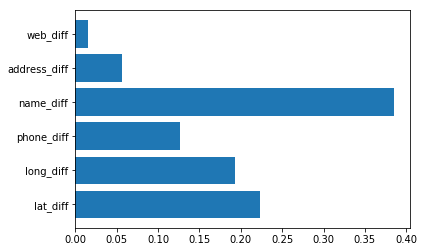

In [178]:
rf.feature_importances_
plt.barh(range(6), rf.feature_importances_)
plt.yticks(range(6), ['lat_diff','long_diff', 'phone_diff', 'name_diff','address_diff','web_diff'])